<a href="https://colab.research.google.com/github/KonstToIT/Bank_terminal_emulation/blob/master/lifespan_prediction_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Цели исследования

Проверить, можно ли методами машинного обучения предсказать продолжительность жизни по астрологическим показателям человека и его полу.





# Импортируем необходимые компоненты

In [ ]:
pip install numpy --upgrade

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import math as m

Загружаем наш csv файл из github репозитория

In [3]:
url = 'https://raw.githubusercontent.com/KonstToIT/Lifespan_prediction/main/astrology_dataset_ver1.12.csv'

Считываем нашу базу данных из файла

In [4]:
Database=pd.read_csv(url)

#Начинаем преобразование наших данных

Удаляем записи с пропусками

In [5]:
Database=Database.dropna()

Преобразуем содержание ячеек столбцов в целое число

In [6]:
columns=["плутон","нептун","уран","сатурн","юпитер"]
for i in columns:
  Database[i] = Database[i].apply(lambda x:list(map(int,x.split("."))))
  Database[i] = Database[i].apply(lambda x:x[0]+x[1]/60+(x[2]-1)*30) #???

In [7]:
Database["пол"]=Database["пол"].apply(lambda x:1 if x=="M" else 0) # Если Пол Мужской, ставим 1, если женский, 0


## Смотрим на описание наших данных(стандартное отклонение, среднее значение, максимальное значение)

In [8]:
Database.describe()

,пол,плутон,нептун,уран,сатурн,юпитер,годы в днях
count,1395.000000,1395.000000,1395.000000,1395.000000,1395.000000,1395.000000,1395.000000
mean,0.829391,113.383501,160.353166,26.597778,302.067670,187.268268,24959.354839
std,0.376302,3.763601,7.448273,15.563439,106.108534,59.241980,5516.904925
min,0.000000,35.633333,87.016667,7.550000,0.100000,8.683333,876.000000
25%,1.000000,111.283333,156.591667,19.291667,293.266667,138.608333,22187.500000
50%,1.000000,113.250000,159.950000,25.133333,311.450000,179.233333,26329.000000
75%,1.000000,115.633333,164.125000,32.241667,328.183333,229.741667,29048.000000
max,1.000000,120.133333,349.733333,319.700000,3298.183333,302.333333,32390.000000


Строим гистограмму частот значений колонки "годы в днях"

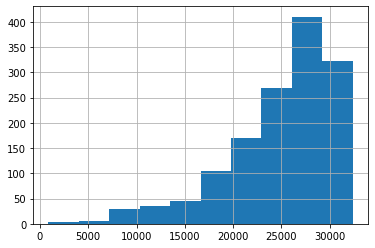

In [9]:
Database["годы в днях"].hist()

## Разбиваем наши данные на тренировочный и тестировочный наборы

In [10]:
train, test=np.split(Database.sample(frac=1), [int(.8*len(Database))])

In [19]:
X_train=train.drop(["годы в днях"], axis="columns")

In [20]:
Y_train=train["годы в днях"]

In [21]:
X_test=test.drop(["годы в днях"], axis="columns")
Y_test=test["годы в днях"]

## Отбираем важные признаки(не работает)

In [14]:
fs=FeatureSelector(data=X_train, labels=Y_train)

NameError: ignored

In [15]:
fs.identify_collinear(correlation_threshold=0.98)

NameError: ignored

In [ ]:
fs.plot_collinear(True)

In [ ]:
fs.identify_zero_importance(task="regression",eval_metric="mae",n_iterations=10, early_stopping=True)

In [ ]:
fs.plot_feature_importances(threshold=0.99,plot_n=6)

In [ ]:
fs.identify_low_importance(cumulative_importance=0.99)

## Нормализуем данные с помощью StandardScaler

In [22]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

Описываем тренировочный датасет

In [23]:
pd.DataFrame(X_train).describe()

,0,1,2,3,4,5
count,1.116000e+03,1.116000e+03,1.116000e+03,1.116000e+03,1.116000e+03,1.116000e+03
mean,-6.764800e-17,1.305208e-15,-4.257845e-16,5.093496e-17,-4.170300e-16,-2.292073e-16
std,1.000448e+00,1.000448e+00,1.000448e+00,1.000448e+00,1.000448e+00,1.000448e+00
min,-2.193741e+00,-1.142166e+01,-1.311215e+01,-1.138421e+00,-4.452771e+00,-2.683392e+00
25%,4.558423e-01,-6.778569e-01,-6.656838e-01,-4.449116e-01,-1.166165e-01,-8.249259e-01
50%,4.558423e-01,-5.485861e-02,-4.156861e-02,-9.038531e-02,1.553563e-01,-7.163694e-02
75%,4.558423e-01,6.872994e-01,7.087134e-01,3.329738e-01,4.294867e-01,7.096162e-01
max,4.558423e-01,2.084836e+00,1.962170e+00,1.734431e+01,8.710419e-01,1.925325e+00


# Обучаем различные модели по подготовленным данным и проверяем их эффективность

##Создаем Модель линейной регрессии

In [24]:
clf=LinearRegression()

Обучаем модель линейной регрессии

In [25]:
clf.fit(X_train,Y_train)

LinearRegression()

Предсказываем с помощью модели линейной регрессии продолжительность жизни.

In [26]:
predictions_reg=clf.predict(X_test)

Отображаем результаты в виде двух гистограм- для предсказаний и для фактических значений

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7acd9b9ed0>]],
      dtype=object)

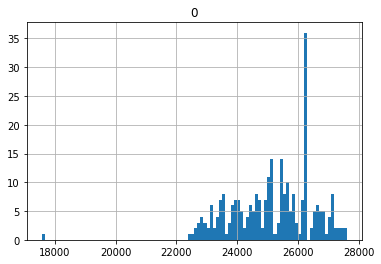

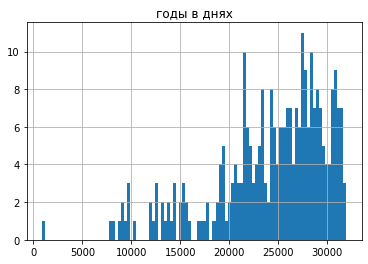

In [27]:
pd.DataFrame(predictions_reg).hist(bins=100)
pd.DataFrame(Y_test).hist(bins=100)

Отображаем результаты в виде значения средней абсолютной ошибки

In [28]:
score=mean_absolute_error(Y_test,predictions_reg)
print(score)

4378.883432591163


## Ищем лучшую модель нейронной сети

Epoch 1/100
32/32 [==============================] - 0s 7ms/step - loss: 25078.5391 - mse: 659065920.0000 - val_loss: 25725.4824 - val_mse: 684679296.0000
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 25078.2168 - mse: 659049920.0000 - val_loss: 25725.1621 - val_mse: 684662784.0000
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 25077.9023 - mse: 659033600.0000 - val_loss: 25724.8398 - val_mse: 684646208.0000
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 25077.5762 - mse: 659017600.0000 - val_loss: 25724.5137 - val_mse: 684629568.0000
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 25077.2520 - mse: 659001152.0000 - val_loss: 25724.1875 - val_mse: 684612672.0000
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 25076.9199 - mse: 658984448.0000 - val_loss: 25723.8535 - val_mse: 684595520.0000
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - los

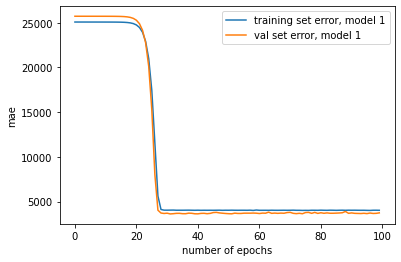

Epoch 1/100
32/32 [==============================] - 0s 6ms/step - loss: 25078.4590 - mse: 659061888.0000 - val_loss: 25725.2910 - val_mse: 684669504.0000
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 25077.9062 - mse: 659034752.0000 - val_loss: 25724.6992 - val_mse: 684639104.0000
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 25077.2422 - mse: 659001088.0000 - val_loss: 25723.9160 - val_mse: 684598720.0000
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 25076.2930 - mse: 658953664.0000 - val_loss: 25722.7402 - val_mse: 684538368.0000
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 25074.8027 - mse: 658879872.0000 - val_loss: 25720.8242 - val_mse: 684439936.0000
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 25072.2910 - mse: 658753792.0000 - val_loss: 25717.4941 - val_mse: 684268672.0000
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - los

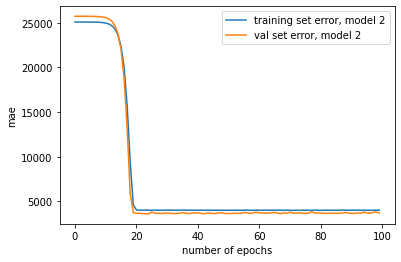

Epoch 1/100
32/32 [==============================] - 0s 6ms/step - loss: 25078.2188 - mse: 659049728.0000 - val_loss: 25724.7773 - val_mse: 684643008.0000
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 25077.0684 - mse: 658992384.0000 - val_loss: 25723.4531 - val_mse: 684574784.0000
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 25075.4453 - mse: 658911040.0000 - val_loss: 25721.4102 - val_mse: 684469760.0000
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 25072.7910 - mse: 658778048.0000 - val_loss: 25717.9277 - val_mse: 684290624.0000
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 25068.1309 - mse: 658545216.0000 - val_loss: 25711.6777 - val_mse: 683969152.0000
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 25059.6426 - mse: 658119168.0000 - val_loss: 25700.1680 - val_mse: 683377280.0000
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - los

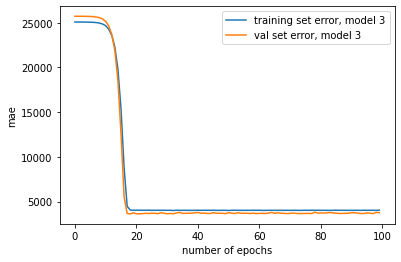

Epoch 1/100
32/32 [==============================] - 0s 6ms/step - loss: 25078.2051 - mse: 659048960.0000 - val_loss: 25724.7441 - val_mse: 684641408.0000
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 25077.0273 - mse: 658990016.0000 - val_loss: 25723.3770 - val_mse: 684571200.0000
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 25075.3516 - mse: 658905600.0000 - val_loss: 25721.2676 - val_mse: 684462656.0000
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 25072.6113 - mse: 658768832.0000 - val_loss: 25717.6582 - val_mse: 684277184.0000
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 25067.7852 - mse: 658526912.0000 - val_loss: 25711.1719 - val_mse: 683943808.0000
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 25058.9805 - mse: 658087232.0000 - val_loss: 25699.2188 - val_mse: 683329408.0000
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - los

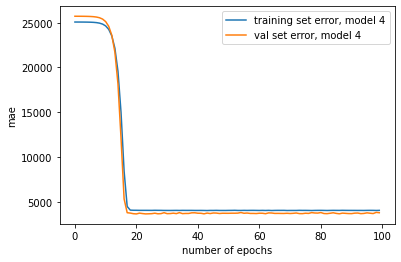

Epoch 1/100
32/32 [==============================] - 0s 7ms/step - loss: 25078.3672 - mse: 659057024.0000 - val_loss: 25725.0996 - val_mse: 684659648.0000
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 25077.6074 - mse: 659019264.0000 - val_loss: 25724.2402 - val_mse: 684615552.0000
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 25076.5957 - mse: 658968000.0000 - val_loss: 25723.0039 - val_mse: 684551744.0000
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 25075.0312 - mse: 658889664.0000 - val_loss: 25720.9902 - val_mse: 684448192.0000
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 25072.3965 - mse: 658757760.0000 - val_loss: 25717.5039 - val_mse: 684268864.0000
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 25067.7246 - mse: 658523648.0000 - val_loss: 25711.2168 - val_mse: 683945536.0000
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - los

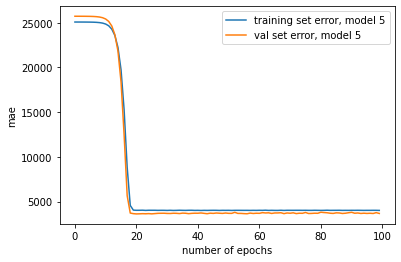

Epoch 1/100
32/32 [==============================] - 0s 6ms/step - loss: 25078.4160 - mse: 659059712.0000 - val_loss: 25725.2148 - val_mse: 684665344.0000
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 25077.7812 - mse: 659027776.0000 - val_loss: 25724.5098 - val_mse: 684629056.0000
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 25076.9590 - mse: 658986560.0000 - val_loss: 25723.5254 - val_mse: 684578496.0000
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 25075.7422 - mse: 658925760.0000 - val_loss: 25721.9883 - val_mse: 684499520.0000
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 25073.7578 - mse: 658825792.0000 - val_loss: 25719.3926 - val_mse: 684365952.0000
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 25070.3027 - mse: 658653056.0000 - val_loss: 25714.7715 - val_mse: 684128256.0000
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - los

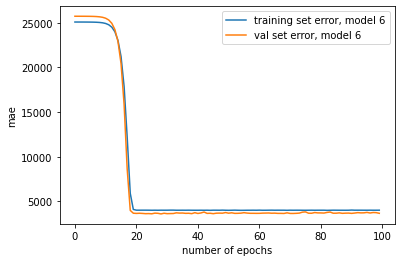

Epoch 1/100
32/32 [==============================] - 0s 7ms/step - loss: 25078.2285 - mse: 659050432.0000 - val_loss: 25724.8008 - val_mse: 684644032.0000
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 25077.1211 - mse: 658995072.0000 - val_loss: 25723.5195 - val_mse: 684578176.0000
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 25075.5645 - mse: 658916480.0000 - val_loss: 25721.5566 - val_mse: 684476992.0000
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 25073.0176 - mse: 658788800.0000 - val_loss: 25718.2090 - val_mse: 684305024.0000
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 25068.5566 - mse: 658565440.0000 - val_loss: 25712.2285 - val_mse: 683997248.0000
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 25060.4453 - mse: 658161792.0000 - val_loss: 25701.2227 - val_mse: 683431424.0000
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - los

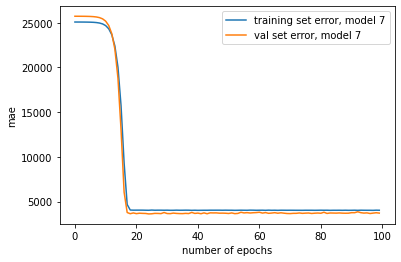

Epoch 1/100
32/32 [==============================] - 0s 6ms/step - loss: 25078.3652 - mse: 659056768.0000 - val_loss: 25725.0977 - val_mse: 684659328.0000
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 25077.5859 - mse: 659018176.0000 - val_loss: 25724.2227 - val_mse: 684614464.0000
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 25076.5469 - mse: 658965760.0000 - val_loss: 25722.9531 - val_mse: 684549120.0000
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 25074.9395 - mse: 658884992.0000 - val_loss: 25720.8906 - val_mse: 684442752.0000
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 25072.2227 - mse: 658748736.0000 - val_loss: 25717.2949 - val_mse: 684257856.0000
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 25067.3906 - mse: 658506112.0000 - val_loss: 25710.7988 - val_mse: 683923776.0000
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - los

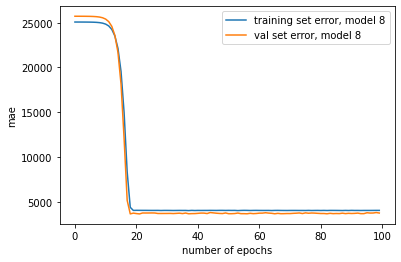

Epoch 1/100
32/32 [==============================] - 0s 6ms/step - loss: 25078.3203 - mse: 659055104.0000 - val_loss: 25725.0059 - val_mse: 684654656.0000
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 25077.4512 - mse: 659011328.0000 - val_loss: 25724.0098 - val_mse: 684603456.0000
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 25076.2539 - mse: 658951360.0000 - val_loss: 25722.5312 - val_mse: 684527424.0000
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 25074.3613 - mse: 658856960.0000 - val_loss: 25720.0840 - val_mse: 684401536.0000
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 25071.1250 - mse: 658694400.0000 - val_loss: 25715.7695 - val_mse: 684179520.0000
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 25065.3164 - mse: 658402048.0000 - val_loss: 25707.9180 - val_mse: 683775680.0000
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - los

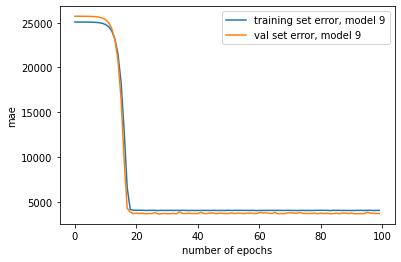

Epoch 1/100
32/32 [==============================] - 0s 7ms/step - loss: 25078.1816 - mse: 659047808.0000 - val_loss: 25724.6855 - val_mse: 684638080.0000
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 25076.9590 - mse: 658986048.0000 - val_loss: 25723.2539 - val_mse: 684564416.0000
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 25075.2012 - mse: 658897984.0000 - val_loss: 25721.0312 - val_mse: 684450112.0000
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 25072.3184 - mse: 658753344.0000 - val_loss: 25717.2207 - val_mse: 684253696.0000
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 25067.2266 - mse: 658497600.0000 - val_loss: 25710.3555 - val_mse: 683900480.0000
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 25057.9258 - mse: 658032320.0000 - val_loss: 25697.7227 - val_mse: 683251008.0000
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - los

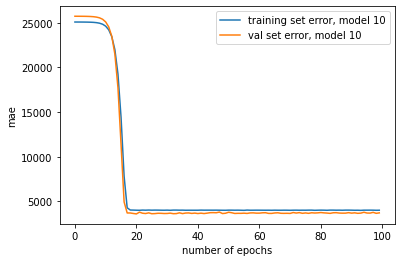

In [184]:
models_and_score=[]#создаем список, в котором будут храниться модель и количество полученных ею очков(значение функции потерь)
for i in range(1,11):
  model=Sequential()
  model.add(Dense(i,activation="linear",input_dim=6,kernel_initializer="normal"))
  model.add(Dense(1))
  model.compile(optimizer="sgd",loss="mae",metrics=["mse"])
  #Обучаем нашу модель
  history=model.fit(X_train, Y_train,epochs=100,validation_split=0.1,verbose=1)
  #Визуализируем обучение
  plt.plot(history.history['loss'],label="training set error, model {0}".format(i))
  plt.plot(history.history['val_loss'],label="val set error, model {0}".format(i))
  plt.xlabel("number of epochs")
  plt.ylabel("mae")
  plt.legend()
  plt.show()
  #добавляем лучшую модель и количество, полученных ею очков в список
  models_and_score.append((model,history.history['loss'][-1]))



In [185]:
best=min(models_and_score,key=lambda x: x[1])
print(best[1])

4015.92236328125


Предсказываем с помощью лучшей модели продолжительность жизни

In [186]:
predictions=best[0].predict(X_test).reshape(279)

In [187]:
print(predictions)

[25396.299 26958.885 27426.78  27694.174 27687.502 27651.684 27185.004
 27458.64  26843.033 25682.217 26831.129 26905.078 27701.957 25354.676
 28189.654 29009.258 25246.73  28397.066 26639.35  27705.215 25344.55
 25339.576 26788.357 26617.107 26795.32  28481.52  26505.908 28410.736
 27055.576 26132.738 28504.398 25354.184 26684.309 24353.945 26151.74
 27714.902 28488.732 27451.375 27640.672 28876.82  27158.652 24581.77
 24609.223 26374.227 24700.16  24572.424 25396.482 26521.121 27695.82
 27708.225 24941.844 26784.377 26954.145 27601.434 27703.016 24991.14
 26021.984 24956.238 27096.838 26941.498 25280.633 25860.121 25523.076
 26015.178 28574.867 26043.168 25091.68  27540.412 27387.545 25664.676
 26176.14  27685.764 25286.393 27065.008 26792.39  25255.389 27627.348
 27723.664 27612.479 28132.92  28666.44  27200.453 25535.96  25542.754
 26527.426 26021.404 26251.238 24323.959 27013.404 24699.154 25829.568
 23838.426 27657.941 25520.93  25695.3   26018.412 28168.719 26613.406
 28487.598 

Визуализируем результаты в виде двух гистограм для наших предсказаний и для фактических значений

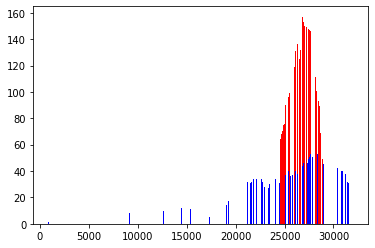

In [196]:
def count_with_error(a,X):
  k=0
  for el in X:
    if abs(el-a)<=1000:
      k+=1
  return k
k_pred=[count_with_error(i,predictions) for i in predictions]
k_test=[count_with_error(i,Y_test) for i in Y_test]

plt.bar(predictions,k_pred,color="red",width=20)
plt.bar(Y_test,k_test,color="blue",width=20)
plt.show()

In [197]:
score_ANN=mean_absolute_error(Y_test,predictions)
print(score_ANN)

4485.428406418011


# Выводы

В ходе исследования были использованы два метода машинного машинного обучения: линейная регрессия и полносвязная нейронная сеть прямого распростанения сигнала. Для финальной оценки была использована нейронная сеть, показавшая лучшие результаты, а именно сеть архитектуры 6,9,1

Модель линейной регрессии справилась с первоначальной задачей- предсказание продолжительности жизни- немного лучше, чем полносвязная нейронная сеть.

средняя ошибка модели линейной регрессии  составила 4378.88 дней, примерно 12 лет.

Средняя абсолютная ошибка лучшей модели нейронной сети составила 4485.42 дней, примерно 12,3 года.

Как видно, оба метода машинного обучения пришли к схожим результатам, что говорит о том, что с помощью имеющегося датасета более правдоподобные предсказания делать не получится. Можно попробовать увеличить датасет и посмотреть, улучшатся ли результаты.